# Stage 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/holiday packages prediction/Travel.xlsx')
df = data.copy()
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Disini terlihat kolom 'Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome' memiliki missing values yg cukup banyak
> 100 items, tipe data sepertinya tidak ada maslah hanya preferensi minor beberapa kolom menggunakan float yg sebaiknya int
supaya mudah dibaca

##Statistical Summary

In [ ]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar','NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','MonthlyIncome']
cats = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus','Designation']

In [ ]:
# ringkasan statistik dari kolom numerik
df[nums].describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


Beberapa pengamatan secara general:
1. Kolom - kolom sekilas tampak sudah cukup simetrik distribusinya (mean dan median tak berbeda jauh)
2. Kolom `MonthlyIncome` tampaknya positifly skewed ke kanan
3. Kolom `ProdTaken`, `Passport`, dan `OwnCar` ternyata bernilai boolean/binary
3. kolom `PreferredPropertyStar`, dan `PitchSatisfactionScore` merupakan kolom rating
4. kolom `CityTier` merupakan kolom kategori yang berbentuk int, dugaan sementara merupakan kolom <br>klasifikasi/kategori dari kota2 tertentu

In [ ]:
# categorical columns 
df[cats].describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


Value Counting memastikan pengamatan mengenai kolom-kolom categorical

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom TypeofContact:
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Value count kolom Occupation:
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Value count kolom Gender:
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Value count kolom ProductPitched:
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

Value count kolom MaritalStatus:
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Value count kolom Designation:
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64



Beberapa pengamatan secara general:
1. Kolom `TypeofContact` memiliki missing values dgn jumlah minor
2. Data dinominasi (proporsi lebih dari 50% dari jumlah baris data) oleh Self Enquiry (`TypeofContact`) 
3. Pada kolom `ProductPitched` menunjukan produk Basic menempati pilihan terbanyak
4. Pada kolom `Designation` menunjukan klasifikasi user Executive dan Manager memiliki jumlah user dgn dominan dari total terbanyak 
5. Pada kolom `Occupation` menunjukan dari 4 klasifikasi tipe pendapatan/pekerjaan user dengan Salaried <br> memiliki jumlah terbanyak 
6. Pada kolom `MaritalStatus` menunjukan klasifikasi user Married memiliki jumlah tertinggi

##Univariate Analysis dan Distribusi Setiap Features terhadap Variabel Target

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 14, 20
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

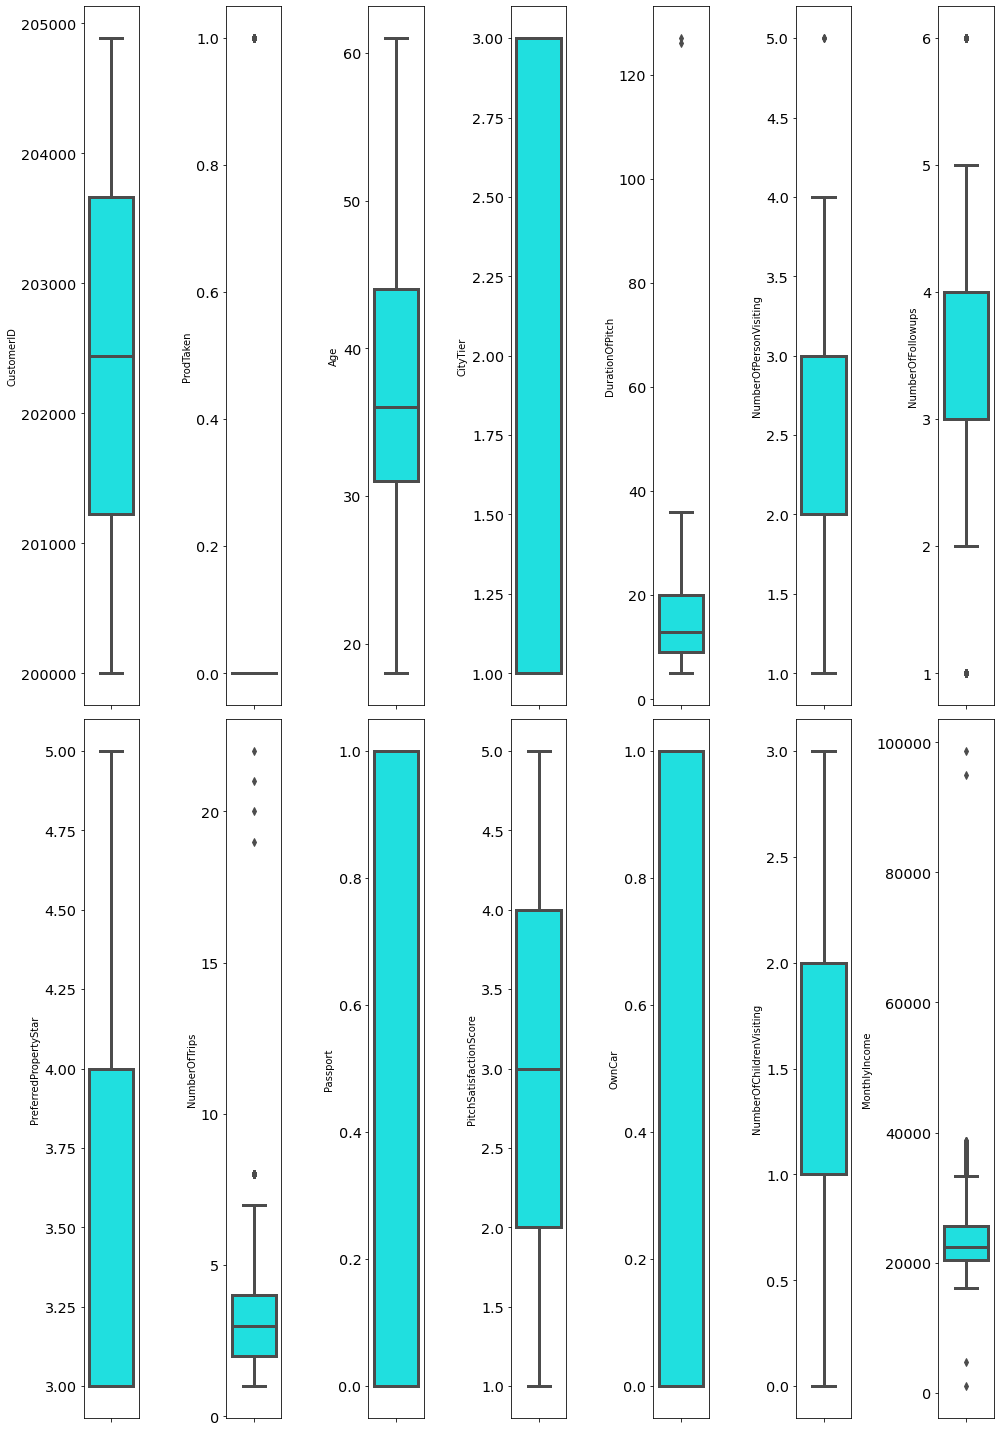

In [ ]:
# Analisis univariat menggunakan boxplot terhadap variabel numerik untuk melihat adanya sebaran outlier
features = nums
for i in range(0, len(nums)):
    plt.subplot(2, len(nums)/2, i+1)
    sns.boxplot(y=df[features[i]], color='Cyan', orient='v')
    plt.tight_layout()

Terdapat beberapa kolom yang memiliki outlier, antara lain: NumberOfTrips, MonthlyIncome, NumberOfFollowups, NumberOfPersonVisiting, DurationOfPitch dan ProdTaken

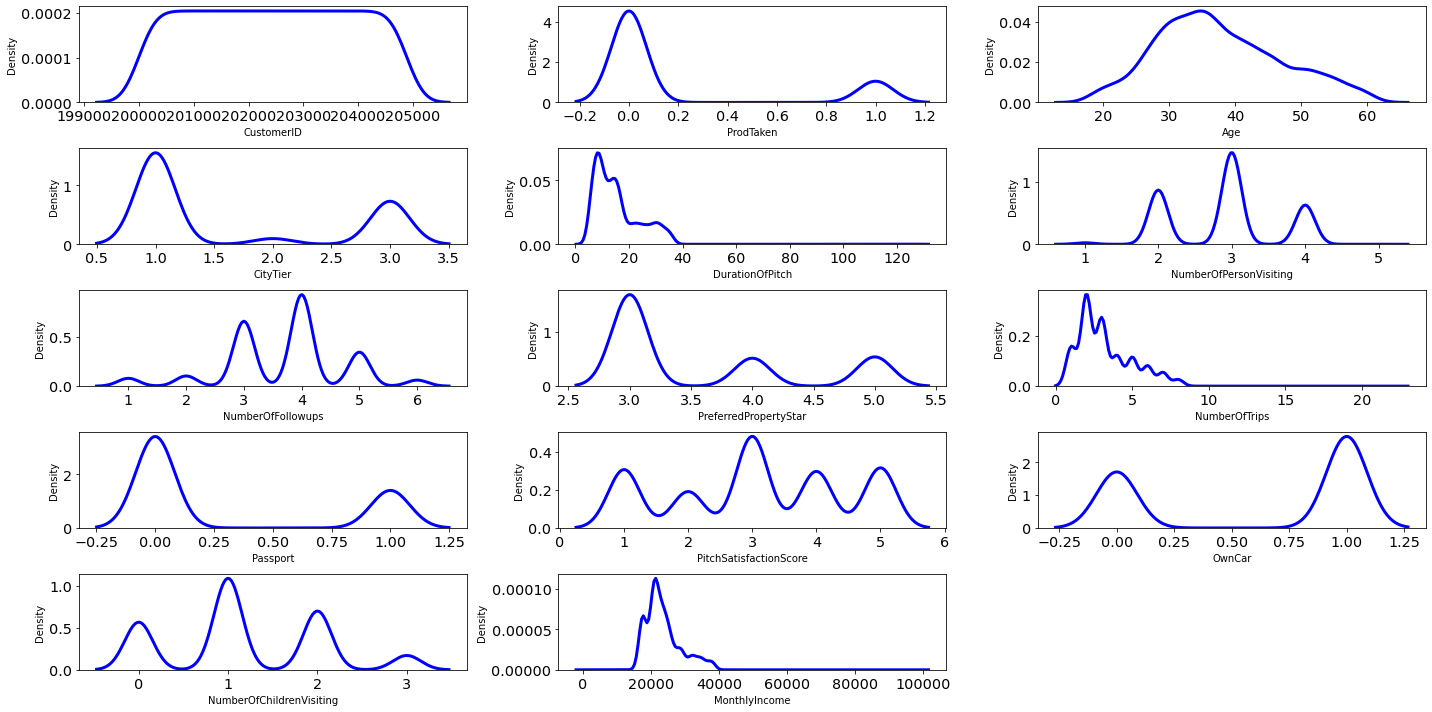

In [ ]:
# Analisis univariat menggunakan histogram terhadap variabel numerik untuk melihat distribusi simetris atau skew
features = nums
plt.figure(figsize=(20, 10))
for i in range(0, len(nums)):
    plt.subplot(5, len(nums)/4, i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

In [ ]:
# melihat kesimetrisan dari variabel yang sejatinya adalah numerik dilihat dari variasi valuenya
print('skew umur:', df['Age'].skew())
print('skew DurationOfPitch:', df['DurationOfPitch'].skew())
print('skew MonthlyIncome:', df['MonthlyIncome'].skew())
print('standart deviasi MonthlyIncome:', df['MonthlyIncome'].std())

skew umur: 0.38298868373855377
skew DurationOfPitch: 1.7520370490349106
skew MonthlyIncome: 1.949159831766865
standart deviasi MonthlyIncome: 5380.698360691633


Interpretasi: 
1. Kolom Age memiliki distribusi mendekati normal atau simetris, bisa dilihat dari gambar dan hasil nilai skew yang mendekati 0 (0.38)
2. Kolom DurationOfPitch dan MonthlyIncome memiliki kecondongan positif (miring ke kanan) yaitu lebih terkonsentrasi di sebelah kiri dan ekor yang panjang di sisi kanan, hasil skew juga menunjukkan masing-masing nilainya berturut-turut adalah 1,75 dan 1,94. Kolom MonthlyIncome memungkinkan untuk dilakukan normalisasi dikarenakan variasi pendapatannya cukup besar
3. Kolom lain tidak begitu diperhatikan distribusinya dikarenakan diantaranya adalah kolom bertipe ordinal dan nominal yang formatnya dibuat dalam bentuk numerik sehingga masih perlu dilakukan Feature Encoding pada tahap preprocessing 

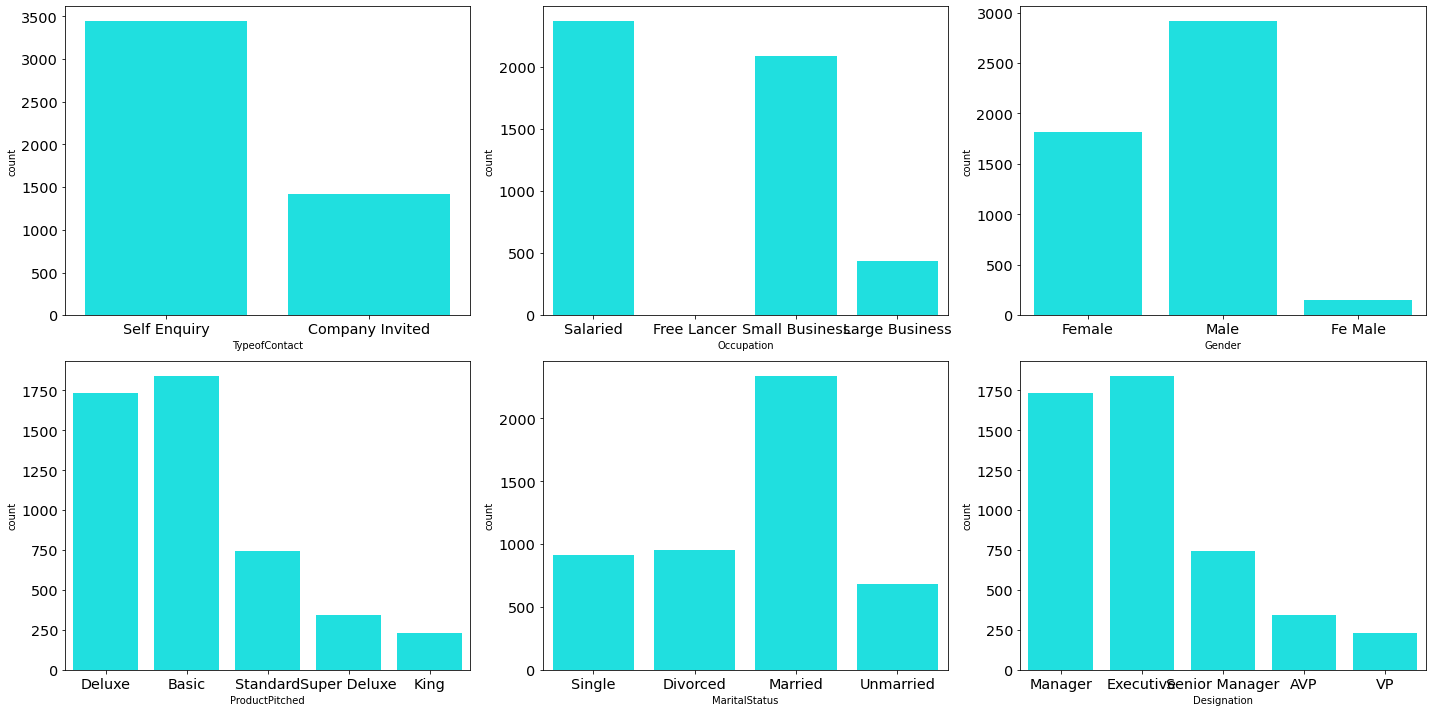

In [ ]:
# Analisis univariat mengguanakan count plot terhadap variabel kategori
plt.figure(figsize=(20, 10))
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df[cats[i]], color='Cyan', orient='v')
    plt.tight_layout()

Interpretasi:
1. Kolom TypeofContact lebih banyak 2 kali lipat pada kategori self enquiry.
2. Kolom Occupation paling banyak dari kategori Salaried sedangkan kategori free lancer tidak ada sama sekali
3. Kolom Gender lebih banyak Male 
4. Kolom ProductPitched kategori paling banyak adalah basic, kemudian berturut-turut jumlahnya semakin sedikit pada kategori deluxe sampai king
5. Kolom MaritalStatus lebih banyak pada pelanggan yang Married
6. Kolom Designation paling banyak adalah kategori Executive

ProdTaken merupakan variabel target dikarenakan Business metricsnya adalah jumlah pembelian paket liburan. Dengan hasil value bisa berupa 0 (Paket Wisata Wellness tidak diambil) atau 1 (Paket Wisata Wellness diambil).

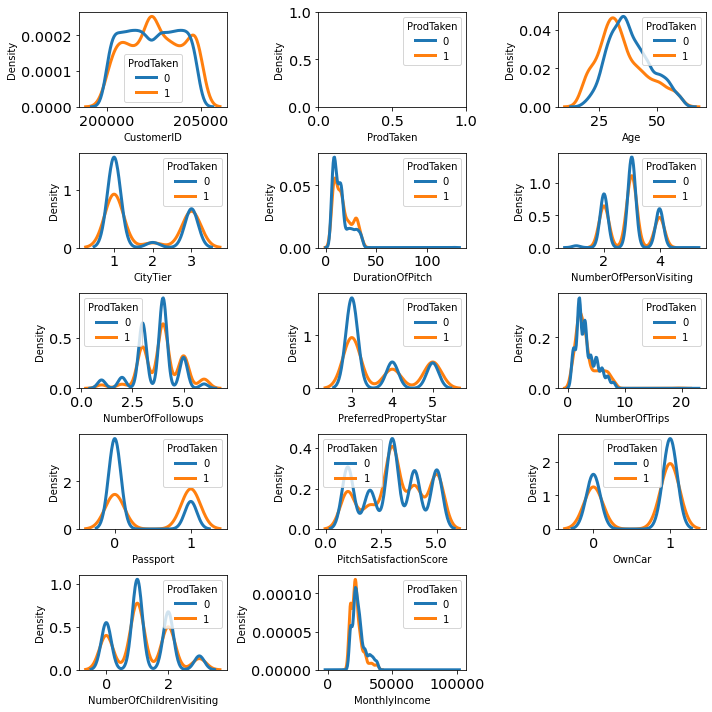

In [ ]:
# Distribusi plot variabel dengan kolom numerik terhadap variabel target (ProdTaken)
features = nums
plt.figure(figsize=(10, 10))
for i in range(0, len(nums)):
    plt.subplot(5, len(nums)/4, i+1)
    sns.kdeplot(x=df[features[i]], hue=df['ProdTaken'], common_norm=False, palette=["C0", "C1"])
    plt.xlabel(features[i])
    plt.tight_layout()

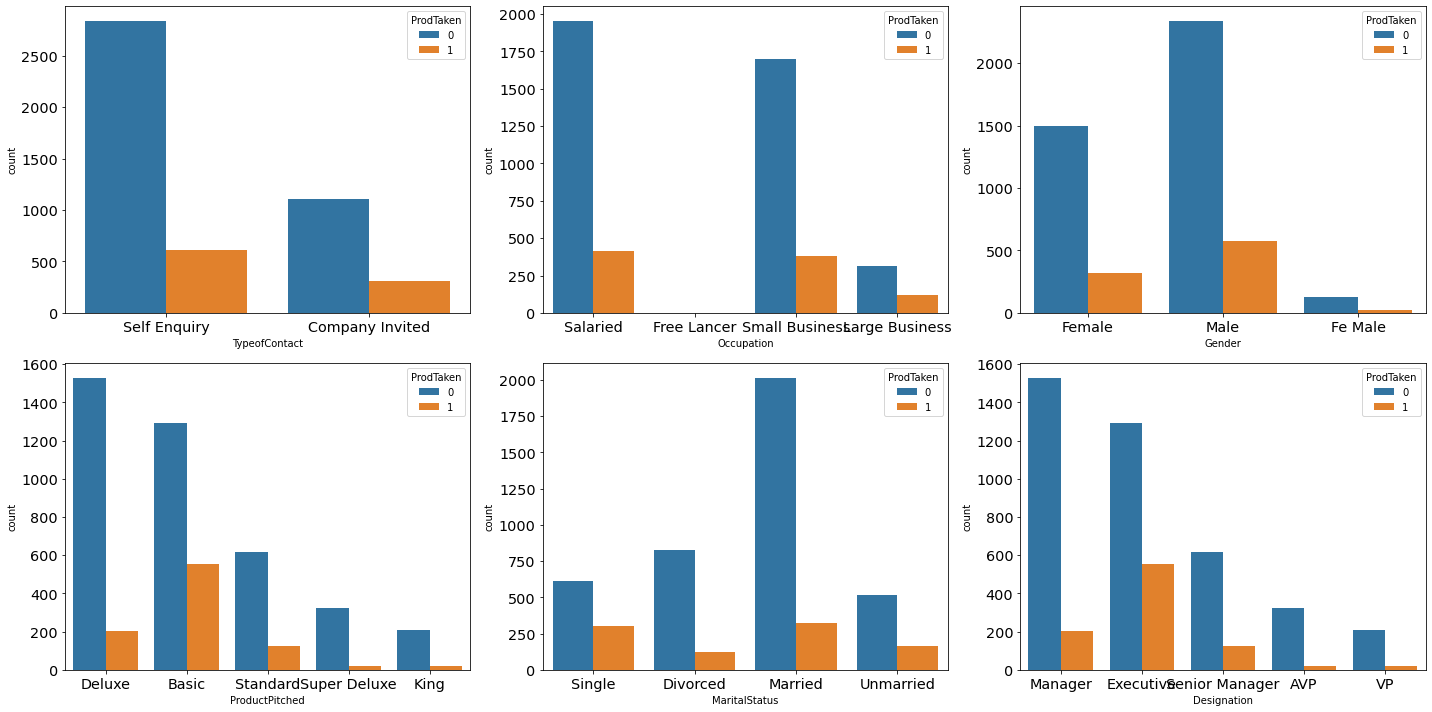

In [ ]:
# Count plot variabel kategori terhadap variabel target (ProdTaken)
plt.figure(figsize=(20, 10))
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df[cats[i]], hue=df['ProdTaken'], palette=["C0", "C1"], orient='v')
    plt.tight_layout()

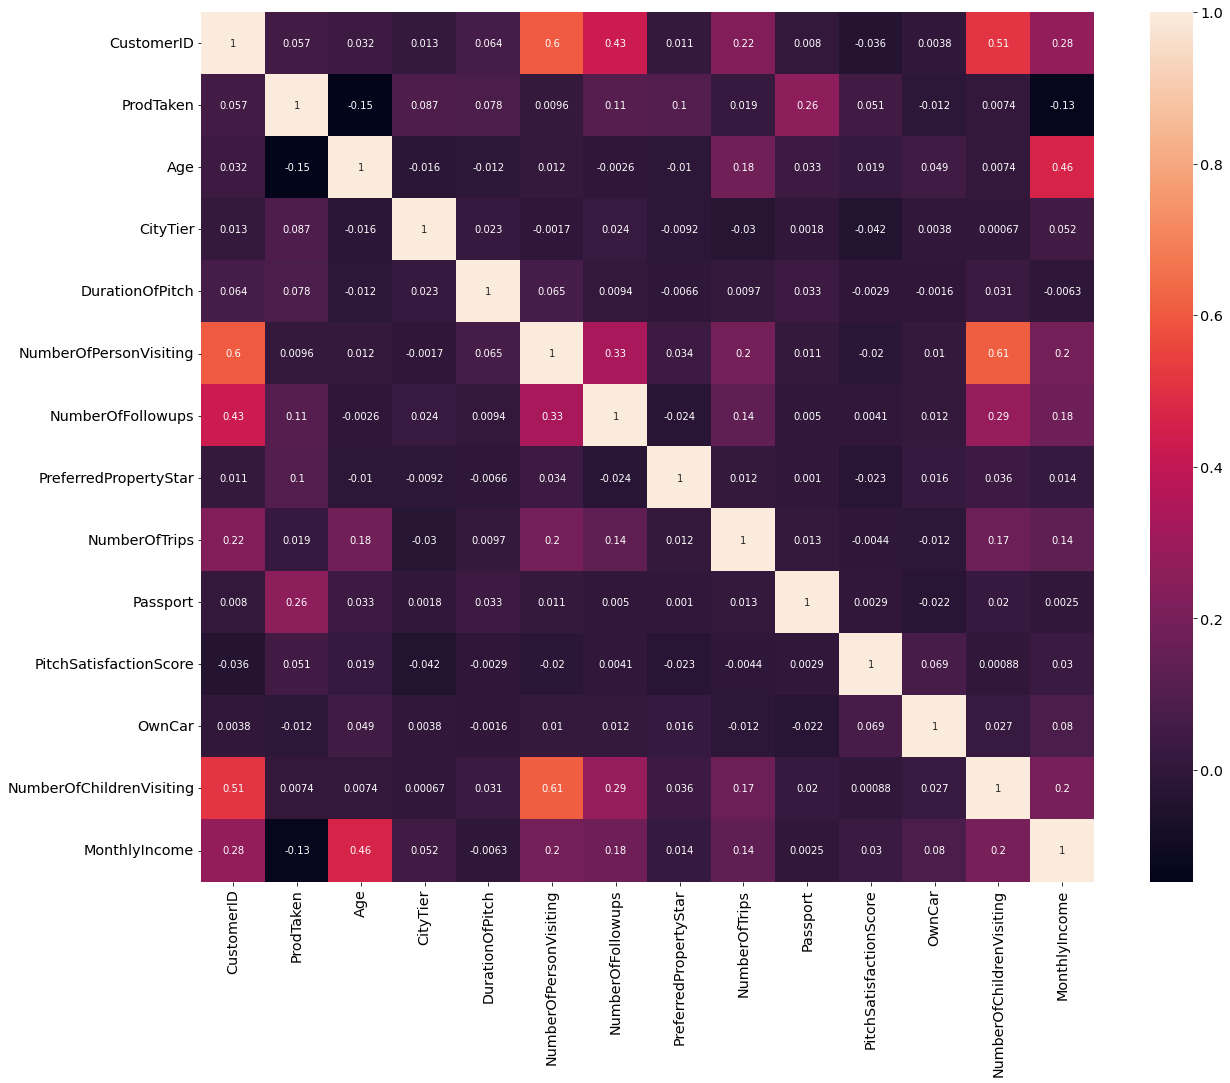

In [ ]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
df.corr()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
CustomerID,1.000000,0.056506,0.032127,0.012975,0.064298,0.604013,0.427539,0.010553,0.224848,0.007974,-0.035847,0.003805,0.511763,0.276833
ProdTaken,0.056506,1.000000,-0.147254,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,0.032127,-0.147254,1.000000,-0.015625,-0.012063,0.011621,-0.002577,-0.010474,0.184905,0.033399,0.018510,0.048654,0.007370,0.464869
CityTier,0.012975,0.086852,-0.015625,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817
DurationOfPitch,0.064298,0.078257,-0.012063,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisiting,0.604013,0.009627,0.011621,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.427539,0.112171,-0.002577,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
PreferredPropertyStar,0.010553,0.099577,-0.010474,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289
NumberOfTrips,0.224848,0.018898,0.184905,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.007974,0.260844,0.033399,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545



##Insight yang Relevan terhadap Masalah


- Passport, Prodtaken, Own car seharusnya menggunakan tipe data boolean
- Number of Trips, Number of Children Visiting, Preferred property star, Number of followups seharusnya menggunakan tipe data integer (tidak mungkin decimal)
- Terdapat kategori 'fe male' pada variable gender yang sebaiknya digabung ke kategori 'female' agar bisa memudahkan eksplorasi dan analisis data
- Terdapat kategori 'Unmarried' pada variable marital status yang sebaiknya digabung ke kategori 'single' agar bisa memudahkan eksplorasi dan analisis data

Variabel yang paling besar korelasinya dengan Prodtaken yaitu:
1. Passport
2. Age
3. Monthly Income
4. Number of Followups
5. Preferred Property Star
6. Number of Person Visiting
7. City Tier
8. Duration of Pitch


1. Passport
  - Data Passport pada dataset yang ada saat ini bertipe data integer. 
  Seharusnya data kepemilikan passport ini diubah menjadi tipe data boolean sesuai dengan jenis datanya.
2. Age
  - Data usia/age memiliki distribusi right-skewed namun tidak terdapat nilai outlier di dalamnya.
3. Monthly Income
  - Data Monthly Income memiliki distribusi right-skewed dan terdapat nilai outlier di dalamnya yang nilainya cukup jauh dari Q3
4. Number of Followups
  - Data Number of Followups memiliki distribusi left-skewed dan terdapat nilai outlier di dalamnya yang nilainya cukup jauh dari Q1 dan Q3
5. Preferred Property Star
  - Data Preferred Property Star memiliki distribusi right-skewed namun tidak terdapat nilai outlier di dalamnya.
6. Number of Children Visiting
  - Data Number of Children Visiting memiliki distribusi right-skewed namun tidak terdapat nilai outlier di dalamnya.
7. City Tier
 - Data City Tier memiliki distribusi right-skewed namun tidak terdapat nilai outlier di dalamnya. 
8. Duration of Pitch
 - Data Duration of Pitch memiliki distribusi right-skewed dan terdapat nilai outlier di dalamnya yang nilainya cukup jauh dari Q3

Variabel kategori terhadap variabel target (ProdTaken)
- Kategori Typeofcontact yang paling banyak menghasilkan Prodtaken adalah "Self Enquiry"
- Kategori Occupation yang paling banyak menghasilkan Prodtaken adalah "Salaried" dan "Small Business"
- Kategori Gender yang paling banyak menghasilkan Prodtaken adalah "Male"
- Kategori Productpitched yang paling banyak menghasilkan Prodtaken adalah "Basic"
- Kategori MaritalStatus yang paling banyak menghasilkan Prodtaken adalah "Single" dan "Married"
- Kategori Designation yang paling banyak menghasilkan Prodtaken adalah "Executive"

# Stage 2

In [ ]:
# Mengubah fe male menjadi female
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.rename_categories({'Fe Male': 'female'})
df['Gender'] = df['Gender'].str.lower()
df['Gender'].value_counts()

male      2916
female    1972
Name: Gender, dtype: int64

In [ ]:
# Mengelompokkan unmarried dan single ke dalam kategori single
df['MaritalStatus'] = df['MaritalStatus'].replace(['Unmarried'], 'Single')
df['MaritalStatus'].value_counts()

Married     2340
Single      1598
Divorced     950
Name: MaritalStatus, dtype: int64

In [ ]:
# Membuang fitur yang tidak digunakan
df.drop(columns=['CustomerID'],inplace = True)

In [ ]:
# Melihat kolom-kolom yang masih mempunyai missing values
df.isna().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [ ]:
# Melihat persentase missing values
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

ProdTaken                   0.000000
Age                         4.623568
TypeofContact               0.511457
CityTier                    0.000000
DurationOfPitch             5.135025
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.920622
ProductPitched              0.000000
PreferredPropertyStar       0.531915
MaritalStatus               0.000000
NumberOfTrips               2.864157
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    1.350245
Designation                 0.000000
MonthlyIncome               4.766776
dtype: float64

In [ ]:
# Menghapus baris yang mengandung missing values < 1%
df = df.dropna(subset=['TypeofContact', 'NumberOfFollowups', 'PreferredPropertyStar'])

In [ ]:
# Mengisi missing values pada kolom 'Age' dan 'DurationOfPitch' dengan mean karena distribusinya mendekati normal, dan mengisi nilai median untuk kolom 'MonthlyIncome' karena skew positif
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['DurationOfPitch'].fillna(df['DurationOfPitch'].mean(), inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

In [ ]:
# Mengisi missing values pada kolom 'NumberOfTrips', 'NumberOfChildrenVisiting', 'PreferredPropertyStar' dengan nilai modus
df['NumberOfTrips'].fillna(df['NumberOfTrips'].mode()[0], inplace=True)
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0], inplace=True)

In [ ]:
# Memeriksa apakah masih ada kolom dengan missing values
df.isna().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [ ]:
# Pengecekan data duplikat
df.duplicated().sum()

140

In [ ]:
# Menghapus data duplikat
df.drop_duplicates(inplace = True)

In [ ]:
# Pengecekan data duplikat kembali untuk memastikan sudah terhapus semua
df.duplicated().sum()

0

In [ ]:
# Melihat jumlah baris setelah menghapus data duplikat
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4652 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4652 non-null   int64  
 1   Age                       4652 non-null   float64
 2   TypeofContact             4652 non-null   object 
 3   CityTier                  4652 non-null   int64  
 4   DurationOfPitch           4652 non-null   float64
 5   Occupation                4652 non-null   object 
 6   Gender                    4652 non-null   object 
 7   NumberOfPersonVisiting    4652 non-null   int64  
 8   NumberOfFollowups         4652 non-null   float64
 9   ProductPitched            4652 non-null   object 
 10  PreferredPropertyStar     4652 non-null   float64
 11  MaritalStatus             4652 non-null   object 
 12  NumberOfTrips             4652 non-null   float64
 13  Passport                  4652 non-null   int64  
 14  PitchSat

In [ ]:
# Memeriksa persebaran outlier
print('\nPersebaran data sebelum ditangani Outlier: ')
print(df[['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome', 'NumberOfFollowups', 'NumberOfPersonVisiting']].describe())


Persebaran data sebelum ditangani Outlier: 
       DurationOfPitch  NumberOfTrips  MonthlyIncome  NumberOfFollowups  \
count      4652.000000    4652.000000    4652.000000        4652.000000   
mean         15.531440       3.196475   23488.410684           3.702709   
std           8.349354       1.829570    5083.135903           1.005237   
min           5.000000       1.000000    1000.000000           1.000000   
25%           9.000000       2.000000   20561.000000           3.000000   
50%          14.000000       3.000000   22368.500000           4.000000   
75%          19.000000       4.000000   25379.750000           4.000000   
max         127.000000      22.000000   98678.000000           6.000000   

       NumberOfPersonVisiting  
count              4652.00000  
mean                  2.91552  
std                   0.72279  
min                   1.00000  
25%                   2.00000  
50%                   3.00000  
75%                   3.00000  
max                   5

In [ ]:
# Menangani outlier dengan metode IQR
Q1 = (df[['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome', 'NumberOfFollowups', 'NumberOfPersonVisiting']]).quantile(0.25)
Q3 = (df[['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome', 'NumberOfFollowups', 'NumberOfPersonVisiting']]).quantile(0.75)

IQR = Q3 - Q1
print('Nilai IQR dari masing-masing Variable adalah: ')
print(IQR)

maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)

minimum = Q1 - (1.5*IQR)
print('Nilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

more_than = (df > maximum)
lower_than = (df < minimum)
df = df.mask(more_than, maximum, axis=1)
df = df.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(df[['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome', 'NumberOfFollowups', 'NumberOfPersonVisiting']].describe())

Nilai IQR dari masing-masing Variable adalah: 
DurationOfPitch             10.00
NumberOfTrips                2.00
MonthlyIncome             4818.75
NumberOfFollowups            1.00
NumberOfPersonVisiting       1.00
dtype: float64
Nilai Maximum dari masing-masing Variable adalah: 
DurationOfPitch              34.000
NumberOfTrips                 7.000
MonthlyIncome             32607.875
NumberOfFollowups             5.500
NumberOfPersonVisiting        4.500
dtype: float64
Nilai Minimum dari masing-masing Variable adalah: 
DurationOfPitch              -6.000
NumberOfTrips                -1.000
MonthlyIncome             13332.875
NumberOfFollowups             1.500
NumberOfPersonVisiting        0.500
dtype: float64

Persebaran data setelah ditangani Outlier: 
       DurationOfPitch  NumberOfTrips  MonthlyIncome  NumberOfFollowups  \
count      4652.000000    4652.000000    4652.000000        4652.000000   
mean         15.460718       3.163156   23269.338860           3.707223   
std   

In [ ]:
cats = ['TypeofContact', 'Occupation', 'ProductPitched', 'MaritalStatus', 'Designation', 'Gender']
df[cats].describe()

,TypeofContact,Occupation,ProductPitched,MaritalStatus,Designation,Gender
count,4652,4652,4652,4652,4652,4652
unique,2,4,5,3,5,2
top,Self Enquiry,Salaried,Basic,Married,Executive,male
freq,3299,2253,1776,2232,1776,2778


In [ ]:
# Melihat values dari kolom-kolom kategorikal
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom TypeofContact:
Self Enquiry       3299
Company Invited    1353
Name: TypeofContact, dtype: int64

Value count kolom Occupation:
Salaried          2253
Small Business    1977
Large Business     420
Free Lancer          2
Name: Occupation, dtype: int64

Value count kolom ProductPitched:
Basic           1776
Deluxe          1637
Standard         713
Super Deluxe     324
King             202
Name: ProductPitched, dtype: int64

Value count kolom MaritalStatus:
Married     2232
Single      1487
Divorced     933
Name: MaritalStatus, dtype: int64

Value count kolom Designation:
Executive         1776
Manager           1637
Senior Manager     713
AVP                324
VP                 202
Name: Designation, dtype: int64

Value count kolom Gender:
male      2778
female    1874
Name: Gender, dtype: int64



In [ ]:
# Label encoding
mapping_ProductPitched = {
    'Basic' : 0,
    'Standard' : 1,
    'Deluxe' : 2,
    'Super Deluxe' : 3,
    'King' : 4   
}

mapping_Designation = {
    'Executive' : 0,
    'Manager' : 1,
    'Senior Manager' : 2,
    'AVP' : 3,
    'VP' : 4   
}

df['ProductPitched'] = df['ProductPitched'].map(mapping_ProductPitched)
df['Designation'] = df['Designation'].map(mapping_Designation)

In [ ]:
# One hot encoding
for cat in ['TypeofContact', 'Occupation', 'MaritalStatus', 'Gender']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [ ]:
# Menghapus kolom yang outdated setelah feature encoding
df = df.drop(columns= ['TypeofContact', 'Occupation', 'MaritalStatus', 'Gender'])

In [ ]:
# Pengecekan kolom-kolom setelah feature encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4652 entries, 0 to 4887
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ProdTaken                      4652 non-null   int64  
 1   Age                            4652 non-null   float64
 2   CityTier                       4652 non-null   int64  
 3   DurationOfPitch                4652 non-null   float64
 4   NumberOfPersonVisiting         4652 non-null   float64
 5   NumberOfFollowups              4652 non-null   float64
 6   ProductPitched                 4652 non-null   int64  
 7   PreferredPropertyStar          4652 non-null   float64
 8   NumberOfTrips                  4652 non-null   float64
 9   Passport                       4652 non-null   int64  
 10  PitchSatisfactionScore         4652 non-null   int64  
 11  OwnCar                         4652 non-null   int64  
 12  NumberOfChildrenVisiting       4652 non-null   f

In [ ]:
# Split Feature and Label
X = df.drop(columns=['ProdTaken'])
y = df['ProdTaken'] # target / label

In [ ]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns = X.columns)

In [ ]:
# melihat jumlah prodtaken di data train
print(pd.Series(y_train).value_counts())

0    2632
1     624
Name: ProdTaken, dtype: int64


In [ ]:
# melihat jumlah prodtaken di data test
print(pd.Series(y_test).value_counts())

0    1143
1     253
Name: ProdTaken, dtype: int64


In [ ]:
#handle imbalance data train
from imblearn import under_sampling, over_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(1).fit_resample(X_train, y_train)

print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

SMOTE
0    2632
1    2632
Name: ProdTaken, dtype: int64


# Modeling

## **Logistic regression**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_over_SMOTE)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_over_SMOTE)
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_over_SMOTE, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_over_SMOTE, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_over_SMOTE, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_over_SMOTE, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))  
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_over_SMOTE, y_pred_proba_train[:, 1]))

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
# modelling dengan SMOTE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_over_SMOTE, y_over_SMOTE)
print('Train score: ' + str(lr.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score: ' + str(lr.score(X_test, y_test))) #accuracy

Train score: 0.7401215805471124
Test score: 0.7478510028653295


In [ ]:
# mengecek perhitungan evaluation metrics
eval_classification(lr)

Accuracy (Train Set): 0.74
Accuracy (Test Set): 0.75
Precision (Train Set): 0.74
Precision (Test Set): 0.40
Recall (Train Set): 0.73
Recall (Test Set): 0.77
F1-Score (Train Set): 0.74
F1-Score (Test Set): 0.53
AUC (test-proba): 0.83
AUC (train-proba): 0.81


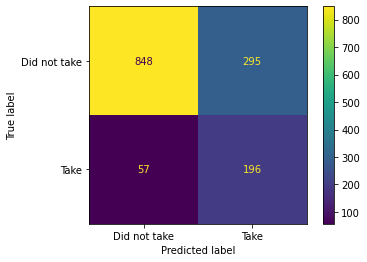

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test, values_format='d', display_labels=['Did not take', 'Take'])

In [ ]:
# Tuning awal
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
solver = ['liblinear', 'newton-cg','lbfgs']
multi_class= ['multinomial']
hyperparameters = dict(penalty=penalty, C=C, solver=solver, multi_class=multi_class)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
tuning_1 = GridSearchCV(logres, hyperparameters, cv=5, scoring='f1')

# Fitting Model & Evaluation
tuning_1.fit(X_over_SMOTE, y_over_SMOTE)
y_pred = tuning_1.predict(X_test)
eval_classification(tuning_1)

Accuracy (Train Set): 0.74
Accuracy (Test Set): 0.75
Precision (Train Set): 0.74
Precision (Test Set): 0.40
Recall (Train Set): 0.74
Recall (Test Set): 0.79
F1-Score (Train Set): 0.74
F1-Score (Test Set): 0.53
AUC (test-proba): 0.83
AUC (train-proba): 0.81


In [ ]:
show_best_hyperparameter(tuning_1)

{'C': 0.002, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
# Iterasi ulang dengan hasil hyperparameter tuning
lr_tuned = LogisticRegression(random_state=42,
                              C=0.001,
                              penalty='l2',            
                              solver='newton-cg',
                              multi_class='multinomial'
                              )
lr_tuned.fit(X_over_SMOTE, y_over_SMOTE)
y_pred = lr_tuned.predict(X_test)
eval_classification(lr_tuned)

Accuracy (Train Set): 0.74
Accuracy (Test Set): 0.75
Precision (Train Set): 0.74
Precision (Test Set): 0.41
Recall (Train Set): 0.74
Recall (Test Set): 0.80
F1-Score (Train Set): 0.74
F1-Score (Test Set): 0.54
AUC (test-proba): 0.83
AUC (train-proba): 0.81


In [ ]:
lr_tuned.score(X_over_SMOTE, y_over_SMOTE), lr_tuned.score(X_test, y_test)

(0.7399316109422492, 0.751432664756447)

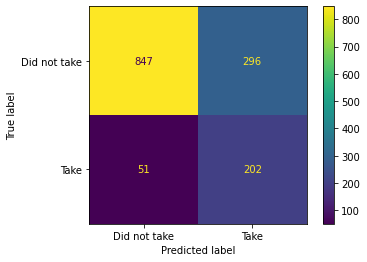

In [ ]:
plot_confusion_matrix(lr_tuned, X_test, y_test, values_format='d', display_labels=['Did not take', 'Take'])

Text(0.5, 1.0, 'feature importance score')

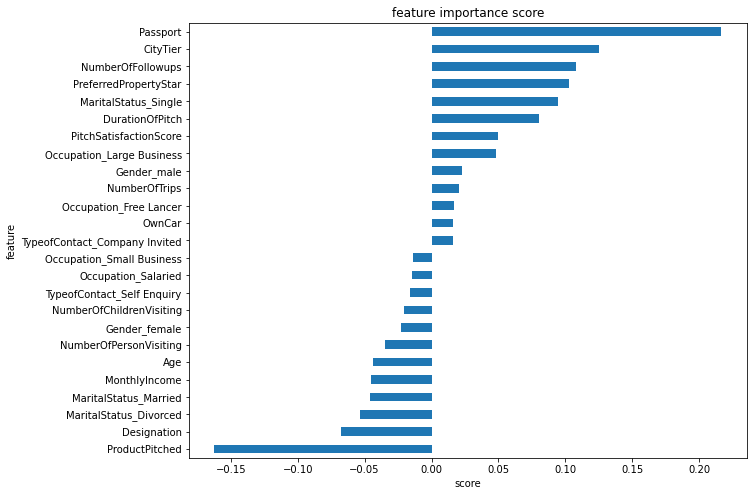

In [ ]:
# melihat best feature dari model yang sudah dituning
importance = lr_tuned.coef_[0]
feat_importances = pd.Series(importance, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [ ]:
# memilih 5 best feature dengan koefisien terbesar 
X_best_feature = X_over_SMOTE.drop(columns=['Occupation_Free Lancer','OwnCar', 'TypeofContact_Company Invited', 'NumberOfTrips', 'Occupation_Large Business',
                                           'Occupation_Salaried', 'Occupation_Small Business', 'TypeofContact_Self Enquiry', 'Age', 'MonthlyIncome',
                                           'MaritalStatus_Married', 'MaritalStatus_Divorced'])
X_test_best_feature = X_test.drop(columns=['Occupation_Free Lancer','OwnCar', 'TypeofContact_Company Invited', 'NumberOfTrips', 'Occupation_Large Business',
                                           'Occupation_Salaried', 'Occupation_Small Business', 'TypeofContact_Self Enquiry', 'Age', 'MonthlyIncome',
                                           'MaritalStatus_Married', 'MaritalStatus_Divorced'])

In [ ]:
def eval_classification(model):
    y_pred = model.predict(X_test_best_feature)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_best_feature, y_over_SMOTE)
print('Train score: ' + str(lr.score(X_best_feature, y_over_SMOTE))) #accuracy
print('Test score: ' + str(lr.score(X_test_best_feature, y_test))) #accuracy

Train score: 0.7454407294832827
Test score: 0.744269340974212


In [ ]:
# mengecek perhitungan evaluation metrics
def eval_classification(model):
    y_pred = model.predict(X_test_best_feature)
    y_pred_train = model.predict(X_best_feature)
    y_pred_proba = model.predict_proba(X_test_best_feature)
    y_pred_proba_train = model.predict_proba(X_best_feature)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_over_SMOTE, y_pred_proba_train[:, 1]))

eval_classification(lr)

Accuracy (Test Set): 0.74
Precision (Test Set): 0.39
Recall (Test Set): 0.75
F1-Score (Test Set): 0.52
AUC (test-proba): 0.83
AUC (train-proba): 0.81


##Decision Tree

In [ ]:
# mengecek perhitungan evaluation metrics
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_over_SMOTE)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_over_SMOTE)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_over_SMOTE, y_pred_proba_train[:, 1]))


from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(dt)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.61
Recall (Test Set): 0.65
F1-Score (Test Set): 0.63
AUC (test-proba): 0.78
AUC (train-proba): 1.00


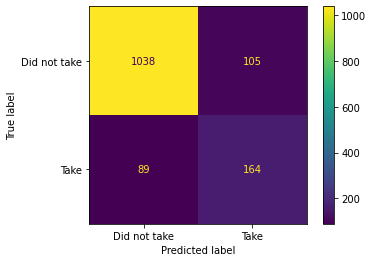

In [ ]:
# confusion matrix sebelum dituning
plot_confusion_matrix(dt, X_test, y_test, values_format='d', display_labels=['Did not take', 'Take'])

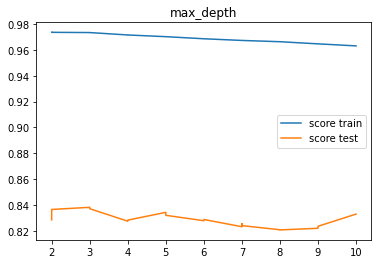

In [ ]:
# mengecek parameter max_depth saja 
values = [int(x) for x in np.linspace(start = 2, stop = 10, num = 20)] # min_samples_split

# melihat perubahan max_depth sengefek apa di skor data training dan testing
train_score = []
test_score = []

for x in values:
    model = DecisionTreeClassifier(max_depth=9, min_samples_split=3, min_samples_leaf=x)
    model.fit(X_over_SMOTE, y_over_SMOTE)
    
    #eval test
    y_pred_proba = model.predict_proba(X_test)
    auc_test = roc_auc_score(y_test, y_pred_proba[:,1])
    test_score.append(auc_test)
    
    #eval train 
    y_pred_proba_train = model.predict_proba(X_over_SMOTE)
    auc_train = roc_auc_score(y_over_SMOTE, y_pred_proba_train[:,1])
    train_score.append(auc_train)

from matplotlib import pyplot as plt
plt.title('max_depth')
plt.plot(values, train_score, label='score train')
plt.plot(values, test_score, label='score test')
plt.legend()
plt.show()

In [ ]:
dtc=DecisionTreeClassifier(random_state=42)
param_grid = { 
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [2,4,6,7,8],
    'min_samples_split' : [2, 5, 7, 10], 
    'min_samples_leaf' : [1, 2, 5] 
}

from sklearn.model_selection import GridSearchCV
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 5)
CV_dtc.fit(X_over_SMOTE, y_over_SMOTE)
print(CV_dtc.best_params_)

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 7}


In [ ]:
dt_tuned = DecisionTreeClassifier(random_state=42, 
                                   max_depth=5, 
                                   min_samples_split=5,
                                   max_features='auto',
                                   min_samples_leaf=1).fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(dt_tuned)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.41
Recall (Test Set): 0.66
F1-Score (Test Set): 0.51
AUC (test-proba): 0.79
AUC (train-proba): 0.84


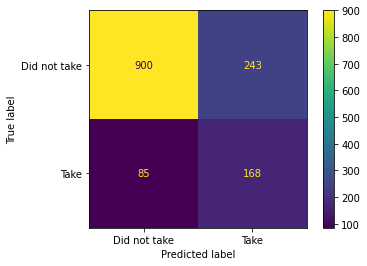

In [ ]:
# confusion matrix setelah dituning
plot_confusion_matrix(dt_tuned, X_test, y_test, values_format='d', display_labels=['Did not take', 'Take'])

Hasil skor akurasi Train > Test atau overfit, maka dari itu akan dilakukan metode bagging yang akan diimplementasikan menggunakan Random Forest untuk mengurangi varians

## **Random forest**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

def eval_classification(rf):
    y_pred = rf.predict(X_test)
    y_pred_train = rf.predict(X_over_SMOTE)
    y_pred_proba = rf.predict_proba(X_test)
    y_pred_proba_train = rf.predict_proba(X_over_SMOTE)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_over_SMOTE, y_pred_proba_train[:, 1]))
    
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_over_SMOTE,y_over_SMOTE)

y_pred = rf.predict(X_test)
eval_classification(rf)

print('Train score: ' + str(rf.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score: ' + str(rf.score(X_test, y_test))) #accuracy

Accuracy (Test Set): 0.92
Precision (Test Set): 0.84
Recall (Test Set): 0.68
F1-Score (Test Set): 0.75
AUC (test-proba): 0.96
AUC (train-proba): 1.00
Train score: 1.0
Test score: 0.917621776504298


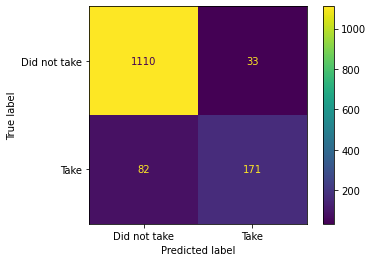

In [ ]:
# confusion matrix sebelum dituning
plot_confusion_matrix(rf, X_test, y_test, values_format='d', display_labels=['Did not take', 'Take'])

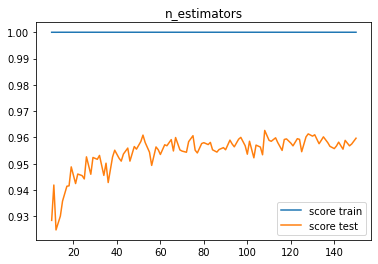

In [ ]:
values = [int(x) for x in np.linspace(start = 10, stop = 150, num = 100)] # n_estimators

# melihat perubahan n_estimator sengefek apa di skor data training dan testing
train_score = []
test_score = []

for x in values:
    model = RandomForestClassifier(n_estimators=x)
    model.fit(X_over_SMOTE, y_over_SMOTE)
    
    #eval test
    y_pred_proba = model.predict_proba(X_test)
    auc_test = roc_auc_score(y_test, y_pred_proba[:,1])
    test_score.append(auc_test)
    
    #eval train 
    y_pred_proba_train = model.predict_proba(X_over_SMOTE)
    auc_train = roc_auc_score(y_over_SMOTE, y_pred_proba_train[:,1])
    train_score.append(auc_train)
    
    # nanti menampilkan ketika k.nya brapa auc test an trainnya berapa 
    #print('k: '+ str(x) + '; auc(train): '+ str(auc_train) + '; auc(test): ' + str(auc_test))

from matplotlib import pyplot as plt
plt.title('n_estimators')
plt.plot(values, train_score, label='score train')
plt.plot(values, test_score, label='score test')
plt.legend()
plt.show()

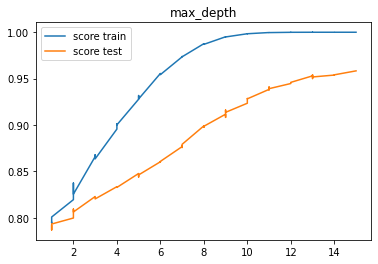

In [ ]:
values = max_depth = [int(x) for x in np.linspace(1, 15, num = 50)] # max_depth

# melihat perubahan max_depth terhadap skor data training dan testing
train_score = []
test_score = []

for x in values:
    model = RandomForestClassifier(n_estimators=130, max_depth=x)
    model.fit(X_over_SMOTE, y_over_SMOTE)
    
    #eval test
    y_pred_proba = model.predict_proba(X_test)
    auc_test = roc_auc_score(y_test, y_pred_proba[:,1])
    test_score.append(auc_test)
    
    #eval train 
    y_pred_proba_train = model.predict_proba(X_over_SMOTE)
    auc_train = roc_auc_score(y_over_SMOTE, y_pred_proba_train[:,1])
    train_score.append(auc_train)
    
    # nanti menampilkan ketika max_depth.nya brapa auc test an trainnya berapa 
    #print('max_depth: '+ str(x) + '; auc(train): '+ str(auc_train) + '; auc(test): ' + str(auc_test))

from matplotlib import pyplot as plt
plt.title('max_depth')
plt.plot(values, train_score, label='score train')
plt.plot(values, test_score, label='score test')
plt.legend()
plt.show()

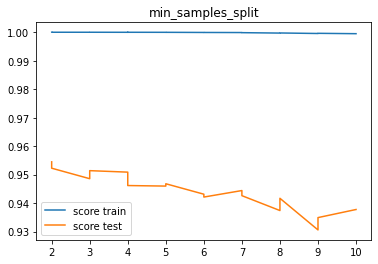

In [ ]:
values = [int(x) for x in np.linspace(start = 2, stop = 10, num = 20)] # min_samples_split

# melihat perubahan min_samples_split terhadap skor data training dan testing
train_score = []
test_score = []

for x in values:
    model = RandomForestClassifier(n_estimators=130, max_depth=14, min_samples_split=x )
    model.fit(X_over_SMOTE, y_over_SMOTE)
    
    #eval test
    y_pred_proba = model.predict_proba(X_test)
    auc_test = roc_auc_score(y_test, y_pred_proba[:,1])
    test_score.append(auc_test)
    
    #eval train 
    y_pred_proba_train = model.predict_proba(X_over_SMOTE)
    auc_train = roc_auc_score(y_over_SMOTE, y_pred_proba_train[:,1])
    train_score.append(auc_train)
    
    # nanti menampilkan ketika min_samples_split.nya brapa auc test an trainnya berapa 
    #print('min_samples_split: '+ str(x) + '; auc(train): '+ str(auc_train) + '; auc(test): ' + str(auc_test))

from matplotlib import pyplot as plt
plt.title('min_samples_split')
plt.plot(values, train_score, label='score train')
plt.plot(values, test_score, label='score test')
plt.legend()
plt.show()

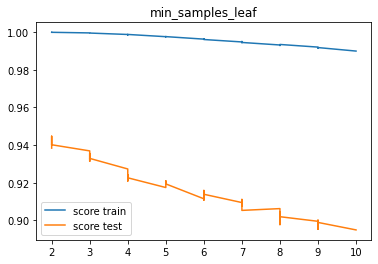

In [ ]:
values = [int(x) for x in np.linspace(start = 2, stop = 10, num = 40)] # min_samples_leaf

# melihat perubahan min_samples_leaf terhadap skor data training dan testing
train_score = []
test_score = []

for x in values:
    model = RandomForestClassifier(n_estimators=130, max_depth=14, min_samples_split=2, min_samples_leaf=x )
    model.fit(X_over_SMOTE, y_over_SMOTE)
    
    #eval test
    y_pred_proba = model.predict_proba(X_test)
    auc_test = roc_auc_score(y_test, y_pred_proba[:,1])
    test_score.append(auc_test)
    
    #eval train 
    y_pred_proba_train = model.predict_proba(X_over_SMOTE)
    auc_train = roc_auc_score(y_over_SMOTE, y_pred_proba_train[:,1])
    train_score.append(auc_train)
    
    # nanti menampilkan ketika min_samples_leaf.nya brapa auc test an trainnya berapa 
    #print('min_samples_leaf: '+ str(x) + '; auc(train): '+ str(auc_train) + '; auc(test): ' + str(auc_test))

from matplotlib import pyplot as plt
plt.title('min_samples_leaf')
plt.plot(values, train_score, label='score train')
plt.plot(values, test_score, label='score test')
plt.legend()
plt.show()

In [ ]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'max_depth' : [2,4,6,7,8],
    'min_samples_split' : [2, 5, 7, 10], 
    'min_samples_leaf' : [1, 2, 5], 
    'n_estimators': [50, 100, 110, 120],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' : ['gini', 'entropy']
}

from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_over_SMOTE, y_over_SMOTE)
print(CV_rfc.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
rf_tuned = RandomForestClassifier(random_state=42, 
                                   n_estimators=100, 
                                   max_depth=3, 
                                   criterion='gini',
                                   max_features= 'log2',
                                   min_samples_split=2, 
                                   min_samples_leaf=2).fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(rf_tuned)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.47
Recall (Test Set): 0.68
F1-Score (Test Set): 0.56
AUC (test-proba): 0.82
AUC (train-proba): 0.87


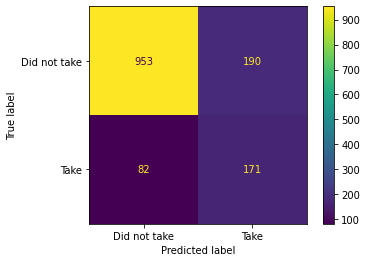

In [ ]:
# melihat confusion matrix setelah dituning
plot_confusion_matrix(rf_tuned, X_test, y_test, values_format='d', display_labels=['Did not take', 'Take'])

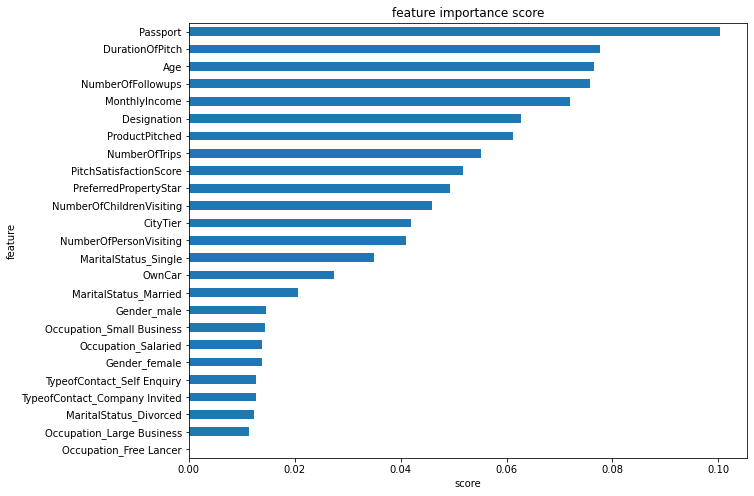

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_tuned = RandomForestClassifier(random_state=42)
rf_tuned.fit(X_over_SMOTE,y_over_SMOTE)
show_feature_importance(rf_tuned)

In [ ]:
# best feature
X_best = X_over_SMOTE.drop(columns=['NumberOfTrips', 'CityTier', 'MaritalStatus_Single', 'OwnCar', 'Occupation_Small Business', 'Occupation_Salaried', 
                                    'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry', 'MaritalStatus_Married','MaritalStatus_Divorced', 
                                    'Occupation_Large Business','Occupation_Free Lancer', 'ProductPitched', 'Designation', 'PitchSatisfactionScore',
                                    'PreferredPropertyStar', 'NumberOfPersonVisiting', 'NumberOfChildrenVisiting', 'Gender_female', 'Gender_male'])
X_test_best = X_test.drop(columns=['NumberOfTrips', 'CityTier', 'MaritalStatus_Single', 'OwnCar', 'Occupation_Small Business', 'Occupation_Salaried', 
                                    'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry', 'MaritalStatus_Married','MaritalStatus_Divorced', 
                                    'Occupation_Large Business','Occupation_Free Lancer', 'ProductPitched', 'Designation', 'PitchSatisfactionScore',
                                    'PreferredPropertyStar', 'NumberOfPersonVisiting', 'NumberOfChildrenVisiting', 'Gender_female', 'Gender_male'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def eval_classification(rf):
    y_pred = rf.predict(X_test_best)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_best,y_over_SMOTE)
eval_classification(rf)
print('Train score: ' + str(rf.score(X_best, y_over_SMOTE))) #accuracy
print('Test score: ' + str(rf.score(X_test_best, y_test))) #accuracy

Train score: 0.9984802431610942
Test score: 0.8889684813753582


## **kNN** ##

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

def eval_classification(knn):
    y_pred = knn.predict(X_test)
    y_pred_train = knn.predict(X_over_SMOTE)
    y_pred_proba = knn.predict_proba(X_test)
    y_pred_proba_train = knn.predict_proba(X_over_SMOTE)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_over_SMOTE, y_pred_proba_train[:, 1]))
    
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [ ]:
#iterasi Pertama untuk mengetahui gambaran awal model KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_over_SMOTE,y_over_SMOTE)

y_pred = knn.predict(X_test)
eval_classification(knn)

print('Train score: ' + str(knn.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score: ' + str(knn.score(X_test, y_test))) #accuracy

Accuracy (Test Set): 0.83
Precision (Test Set): 0.51
Recall (Test Set): 0.93
F1-Score (Test Set): 0.66
AUC (test-proba): 0.93
AUC (train-proba): 1.00
Train score: 0.9411094224924013
Test score: 0.8252148997134671


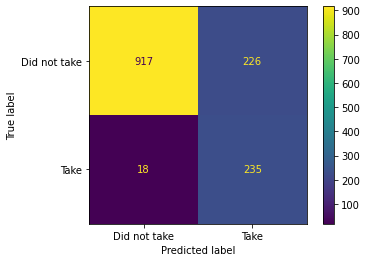

In [ ]:
# melihat confusion matrix sebelum dituning
plot_confusion_matrix(knn, X_test, y_test, values_format='d', display_labels=['Did not take', 'Take'])

In [ ]:
#tunning awal
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier

# List of hyperparameter
n_neighbors = list(range(1,40))
p=[1]
algorithm = ['brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
knn_tunned = GridSearchCV(knn, hyperparameters, cv=5, scoring='accuracy')

# Fit Model & Evaluasi
knn_tunned.fit(X_over_SMOTE,y_over_SMOTE)
y_pred = knn_tunned.predict(X_test)
eval_classification(knn_tunned)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.79
Recall (Test Set): 0.85
F1-Score (Test Set): 0.82
AUC (test-proba): 0.90
AUC (train-proba): 1.00


In [ ]:
show_best_hyperparameter(knn_tunned.best_estimator_, hyperparameters)

Best n_neighbors: 1
Best p: 1
Best algorithm: brute


In [ ]:
model_tuned_knn = KNeighborsClassifier(n_neighbors =2, 
                               p=1, 
                               algorithm = 'brute').fit(X_over_SMOTE, y_over_SMOTE)
model_tuned_knn.score(X_over_SMOTE, y_over_SMOTE), model_tuned_knn.score(X_test, y_test)

(0.9986702127659575, 0.9290830945558739)

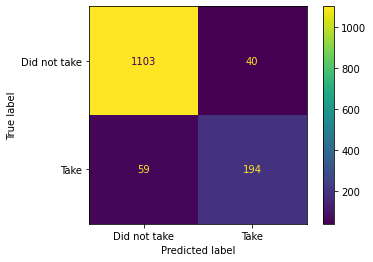

In [ ]:
# melihat confusion matrix setelah dituning
plot_confusion_matrix(model_tuned_knn, X_test, y_test, values_format='d', display_labels=['Did not take', 'Take'])

## **Adaboost** ##

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

def eval_classification(ab):
    y_pred = ab.predict(X_test)
    y_pred_train = ab.predict(X_over_SMOTE)
    y_pred_proba = ab.predict_proba(X_test)
    y_pred_proba_train = ab.predict_proba(X_over_SMOTE)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_over_SMOTE, y_pred_proba_train[:, 1]))
    
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [ ]:
#iterasi Pertama untuk mengetahui gambaran awal model Adaboost
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_over_SMOTE,y_over_SMOTE)

y_pred = ab.predict(X_test)
eval_classification(ab)

print('Train score: ' + str(ab.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score: ' + str(ab.score(X_test, y_test))) #accuracy

Accuracy (Test Set): 0.82
Precision (Test Set): 0.51
Recall (Test Set): 0.55
F1-Score (Test Set): 0.53
AUC (test-proba): 0.81
AUC (train-proba): 0.94
Train score: 0.8668313069908815
Test score: 0.8237822349570201


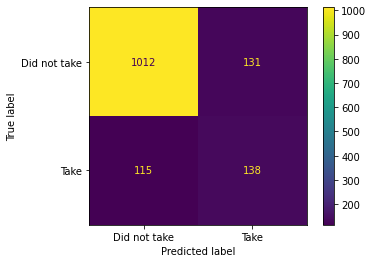

In [ ]:
# melihat confusion matrix sebelum dituning
plot_confusion_matrix(ab, X_test, y_test, values_format='d', display_labels=['Did not take', 'Take'])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, cv=5, scoring='accuracy')
ab_tuned.fit(X_over_SMOTE,y_over_SMOTE)

# Predict & Evaluation
eval_classification(ab_tuned)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.59
Recall (Test Set): 0.53
F1-Score (Test Set): 0.56
AUC (test-proba): 0.84
AUC (train-proba): 0.95


In [ ]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1782
Best learning_rate: 0.08457788944723618
Best algorithm: SAMME.R


In [ ]:
model_tuned = AdaBoostClassifier(random_state=42, 
                               n_estimators=1764,
                               learning_rate=0.049753768844221107, 
                               algorithm = 'SAMME.R').fit(X_over_SMOTE, y_over_SMOTE)
model_tuned.score(X_over_SMOTE, y_over_SMOTE), model_tuned.score(X_test, y_test)

(0.8731003039513677, 0.8445558739255015)

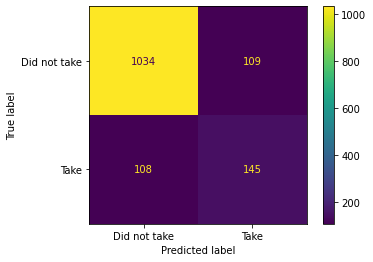

In [ ]:
# melihat confusion matrix setelah dituning
plot_confusion_matrix(model_tuned, X_test, y_test, values_format='d', display_labels=['Did not take', 'Take'])

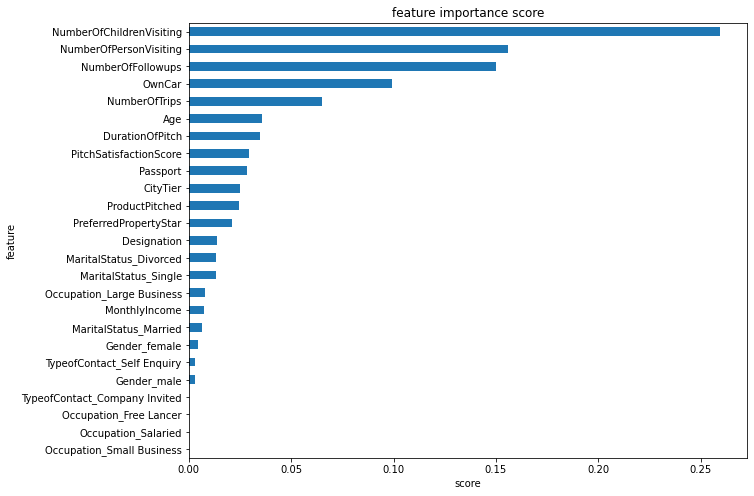

In [ ]:
show_feature_importance(model_tuned)

## **XGBoost** ##

In [ ]:
import xgboost as xgb
clf_xgb = xgb.XGBClassifier(Missing=None, seed=42)
clf_xgb.fit(X_over_SMOTE, 
            y_over_SMOTE, 
            verbose=True, 
            early_stopping_rounds=10, 
            eval_metric='auc', 
            eval_set=[(X_test, y_test)])

[0]	validation_0-auc:0.750488
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.770317
[2]	validation_0-auc:0.785538
[3]	validation_0-auc:0.785182
[4]	validation_0-auc:0.784684
[5]	validation_0-auc:0.788944
[6]	validation_0-auc:0.794188
[7]	validation_0-auc:0.811912
[8]	validation_0-auc:0.811343
[9]	validation_0-auc:0.818585
[10]	validation_0-auc:0.821716
[11]	validation_0-auc:0.824066
[12]	validation_0-auc:0.823666
[13]	validation_0-auc:0.828355
[14]	validation_0-auc:0.828041
[15]	validation_0-auc:0.829033
[16]	validation_0-auc:0.829388
[17]	validation_0-auc:0.832135
[18]	validation_0-auc:0.833553
[19]	validation_0-auc:0.833197
[20]	validation_0-auc:0.834047
[21]	validation_0-auc:0.834915
[22]	validation_0-auc:0.834853
[23]	validation_0-auc:0.836769
[24]	validation_0-auc:0.838031
[25]	validation_0-auc:0.838574
[26]	validation_0-auc:0.839577
[27]	validation_0-auc:0.839667
[28]	validation_0-auc:0.841854
[29]	validation_0-auc:0.841854
[30]	validation_

XGBClassifier(Missing=None, seed=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_over_SMOTE)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_over_SMOTE)
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_over_SMOTE, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_over_SMOTE, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_over_SMOTE, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_over_SMOTE, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))  
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_over_SMOTE, y_pred_proba_train[:, 1]))

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())
eval_classification(clf_xgb)

Accuracy (Train Set): 0.91
Accuracy (Test Set): 0.86
Precision (Train Set): 0.95
Precision (Test Set): 0.66
Recall (Train Set): 0.87
Recall (Test Set): 0.50
F1-Score (Train Set): 0.91
F1-Score (Test Set): 0.57
AUC (test-proba): 0.86
AUC (train-proba): 0.97


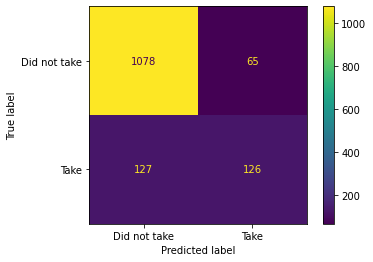

In [ ]:
from sklearn.metrics import plot_confusion_matrix
# melihat confusion matrix sebelum dituning
plot_confusion_matrix(clf_xgb, X_test, y_test, values_format='d', display_labels=['Did not take', 'Take'])

In [ ]:
clf_xgb_tuned = xgb.XGBClassifier(Missing=None, 
                            seed=42, 
                            learning_rate = 0.009,
                            n_estimators= 300,
                            max_depth=4,
                            gamma=0.5,                        
                            subsample=0.9,
                            colsample_bytree=0.7,
                            objective= 'binary:logistic',
                            tree_method='approx',
                            min_child_weight=1,
                            scale_pos_weight=1,
                            reg_lambda=1)

clf_xgb_tuned.fit(X_over_SMOTE, 
            y_over_SMOTE, 
            verbose=True, 
            early_stopping_rounds=10, 
            eval_metric='auc', 
            eval_set=[(X_test, y_test)])

[0]	validation_0-auc:0.699835
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.776439
[2]	validation_0-auc:0.784746
[3]	validation_0-auc:0.781518
[4]	validation_0-auc:0.799883
[5]	validation_0-auc:0.808459
[6]	validation_0-auc:0.814478
[7]	validation_0-auc:0.814781
[8]	validation_0-auc:0.816484
[9]	validation_0-auc:0.820929
[10]	validation_0-auc:0.817492
[11]	validation_0-auc:0.819048
[12]	validation_0-auc:0.821007
[13]	validation_0-auc:0.822174
[14]	validation_0-auc:0.825029
[15]	validation_0-auc:0.825916
[16]	validation_0-auc:0.827584
[17]	validation_0-auc:0.828684
[18]	validation_0-auc:0.827375
[19]	validation_0-auc:0.826931
[20]	validation_0-auc:0.82765
[21]	validation_0-auc:0.826578
[22]	validation_0-auc:0.826317
[23]	validation_0-auc:0.82714
[24]	validation_0-auc:0.827154
[25]	validation_0-auc:0.827629
[26]	validation_0-auc:0.82727
[27]	validation_0-auc:0.829951
[28]	validation_0-auc:0.831156
[29]	validation_0-auc:0.830883
[30]	validation_0-a

XGBClassifier(Missing=None, colsample_bytree=0.7, gamma=0.5,
              learning_rate=0.009, max_depth=4, n_estimators=300, seed=42,
              subsample=0.9, tree_method='approx')

In [ ]:
eval_classification(clf_xgb_tuned)

Accuracy (Train Set): 0.84
Accuracy (Test Set): 0.83
Precision (Train Set): 0.88
Precision (Test Set): 0.52
Recall (Train Set): 0.78
Recall (Test Set): 0.60
F1-Score (Train Set): 0.83
F1-Score (Test Set): 0.56
AUC (test-proba): 0.84
AUC (train-proba): 0.91


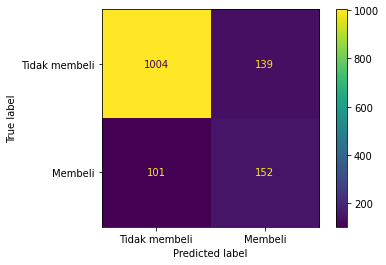

In [ ]:
plot_confusion_matrix(clf_xgb_tuned, X_test, y_test, display_labels=['Tidak membeli', 'Membeli'])
plt.savefig("confusion matrix.jpg", dpi=150)

In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 23.9 MB/s 


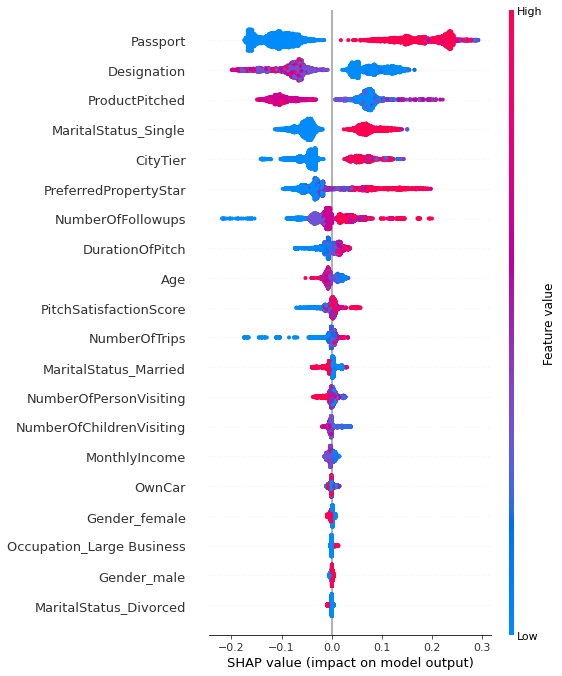

In [ ]:
import shap
explainer = shap.Explainer(clf_xgb_tuned)
shap_values = explainer(X_over_SMOTE)
shap.summary_plot(shap_values, X_over_SMOTE,show=False)
plt.tight_layout()
plt.savefig('shapvalue.png')